<a href="https://colab.research.google.com/github/Aditi15091999/AML-Assignments/blob/main/AML_Assignment_Customer_Purchase_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the dataset with pandas
dataset=pd.read_excel('purchase.xlsx')
dataset

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS
...,...,...,...,...,...,...,...,...,...
5972,COPIERS AND FAX,Prod_16,Cust_1397,20265.220,47,6168.64,14.70,0.37,HOME OFFICE
5973,COPIERS AND FAX,Prod_16,Cust_247,24559.910,47,7358.66,16.63,0.37,SMALL BUSINESS
5974,COPIERS AND FAX,Prod_16,Cust_1795,28359.400,49,14440.39,24.49,0.52,SMALL BUSINESS
5975,COPIERS AND FAX,Prod_16,Cust_595,41343.210,8,3852.19,24.49,0.37,HOME OFFICE


In [ ]:
dataset.isnull().sum()


In [4]:
dataset.drop(columns=['Products'],axis=1,inplace=True)
dataset.drop(columns=['Prod_id'],axis=1,inplace=True)

In [5]:
X=dataset.iloc[:,[1,3]].values
X

array([[1.0909641e+04, 2.6164600e+03],
       [1.0607641e+04, 2.9773600e+03],
       [7.5464100e+02, 2.9800000e+01],
       ...,
       [2.8359400e+04, 1.4440390e+04],
       [4.1343210e+04, 3.8521900e+03],
       [2.5312000e+04, 8.7888100e+03]])

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [7]:
from sklearn.preprocessing import normalize
data_scaled=normalize(X)

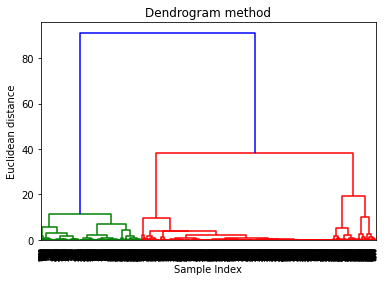

In [8]:
#using dendrogram method to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='ward')) #ward is a within cluster variance methods finds dist btwn num and minimizes the variance
plt.title('Dendrogram method')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean distance')
plt.show()

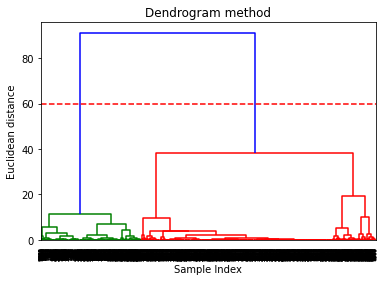

In [9]:
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='ward')) #ward is a within cluster variance methods finds dist btwn num and minimizes the variance
plt.axhline(y=60,color='r',linestyle='--')
plt.title('Dendrogram method')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean distance')
plt.show()

In [10]:
#fitting HC to the dataset
#agglomerative HC

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage='ward')

y_hc=hc.fit_predict(X)
print(y_hc)


[0 0 1 ... 0 0 0]


In [11]:
dataset['Clusternum']=hc.labels_


In [12]:
dataset.head()

,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Clusternum
0,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE,0
1,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE,0
2,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS,1
3,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS,1
4,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS,0


In [13]:
dataset.Clusternum.unique()

array([0, 1])

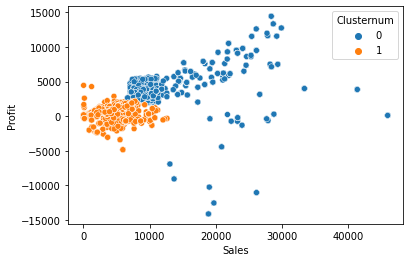

In [14]:
import seaborn as sns
sns.scatterplot(x='Sales',y='Profit',data=dataset,hue='Clusternum')


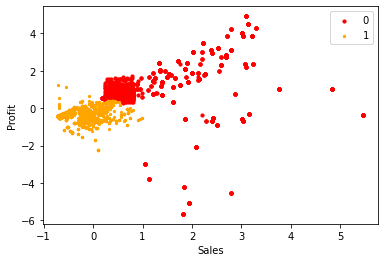

In [21]:
plt.scatter(X[y_hc==0, 0],X[y_hc==0, 1],s=10, c="red" , label='0')
plt.scatter(X[y_hc==1, 0],X[y_hc==1, 1],s=5, c="orange" , label='1')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()
